In [1]:
import time
import sys
import os

# 현재 파일(main.ipynb)이 있는 디렉토리의 부모 디렉토리를 sys.path에 추가
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
# INFO 
from gameInfo import *
from hyperParams import *
from setDevice import *

# CODES
from state.ver2 import *
from network.resnet import *
from trainer.ver1 import *
from eval.ver1 import *
from selfplay.ver1 import *
from tester.ver2 import *

In [3]:
model = Network(N_RESIDUAL_BLOCK, N_KERNEL, 2, N_ACTIONS)
params = torch.load("/Users/ijimin/Documents/GitHub/AiGO/Omok/Jimin/model/Omok_1/best_model_weight.pth", weights_only=False)
# params = torch.load("/Users/ijimin/Documents/GitHub/AiGO/Omok/Jimin/model/Jpub/best_model_weight_2.pth", weights_only=False)
model.load_state_dict(params)

<All keys matched successfully>

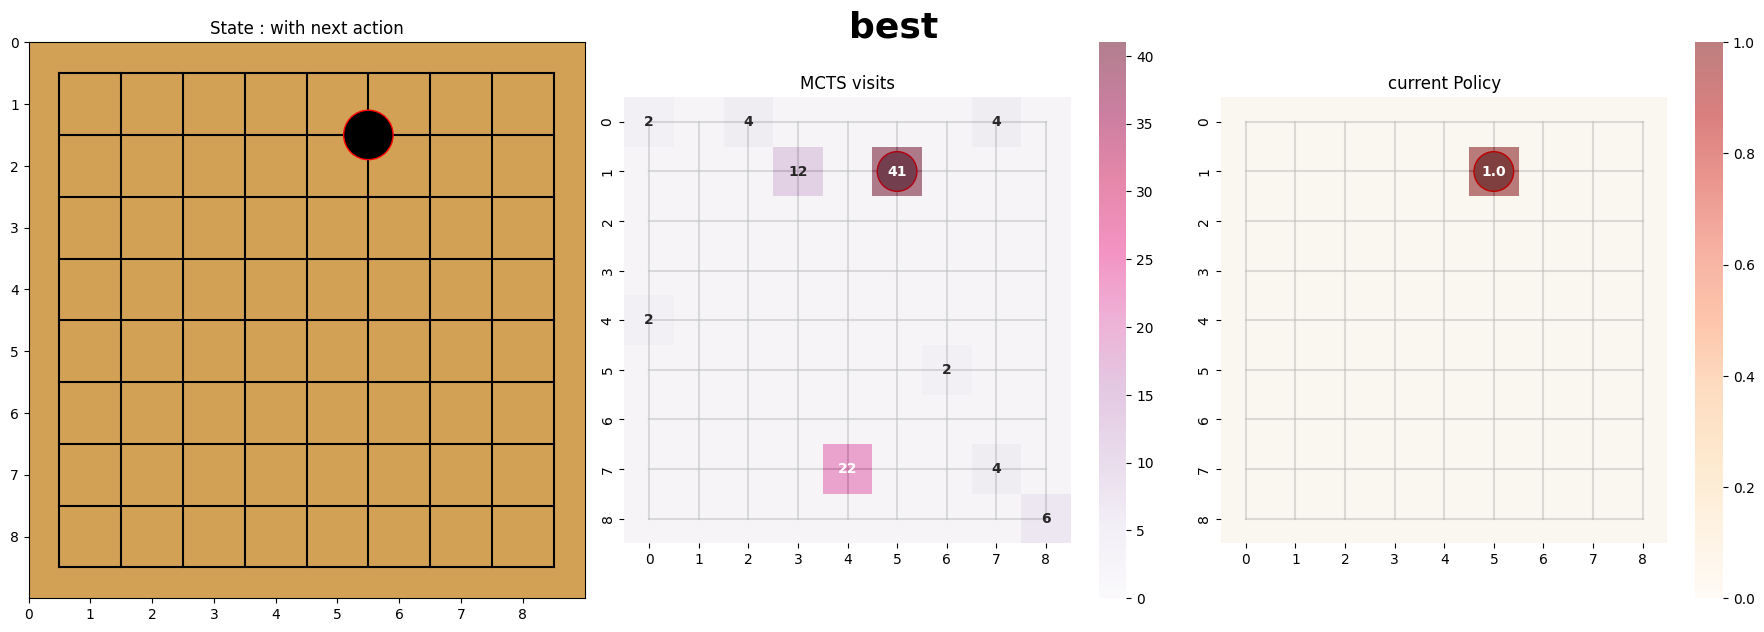

Alpha Zero's Action is : 14


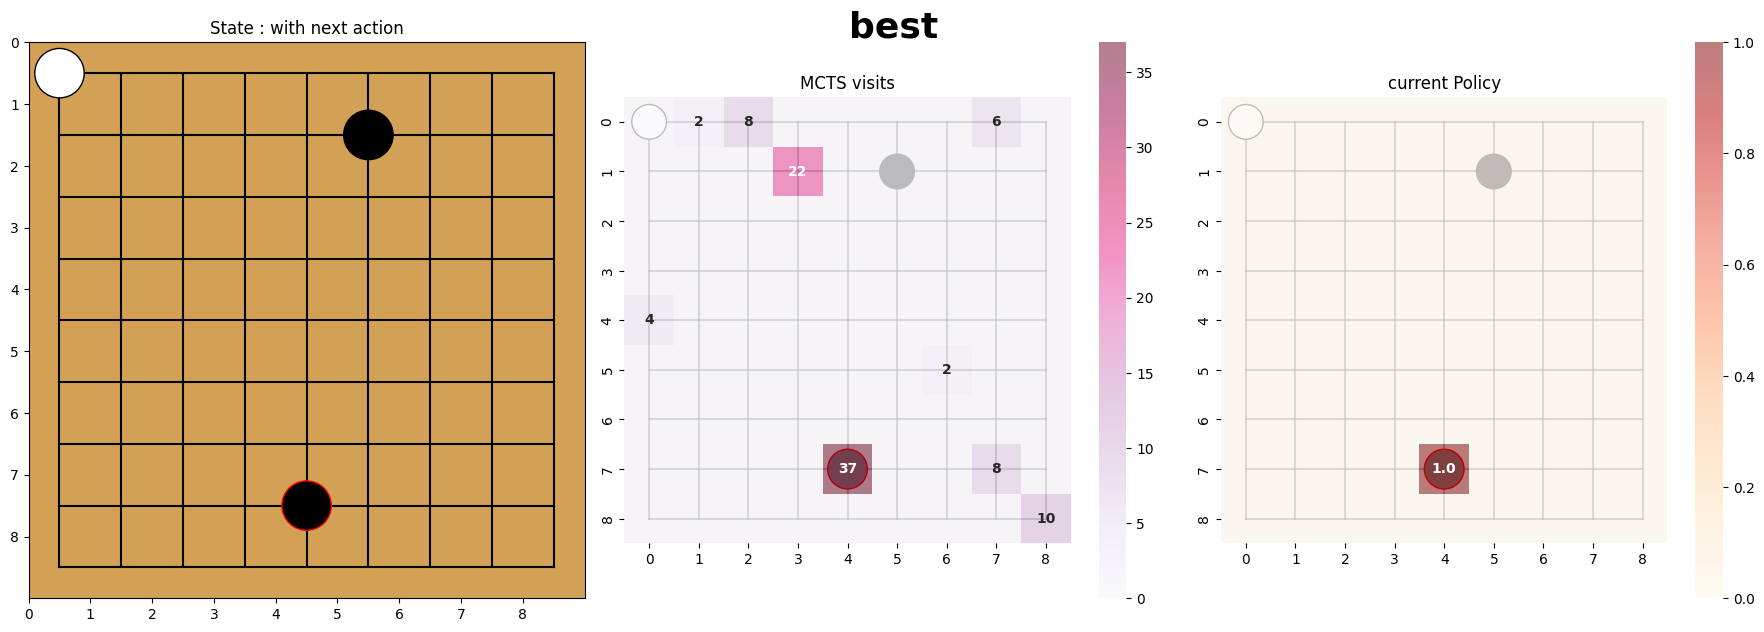

Alpha Zero's Action is : 67


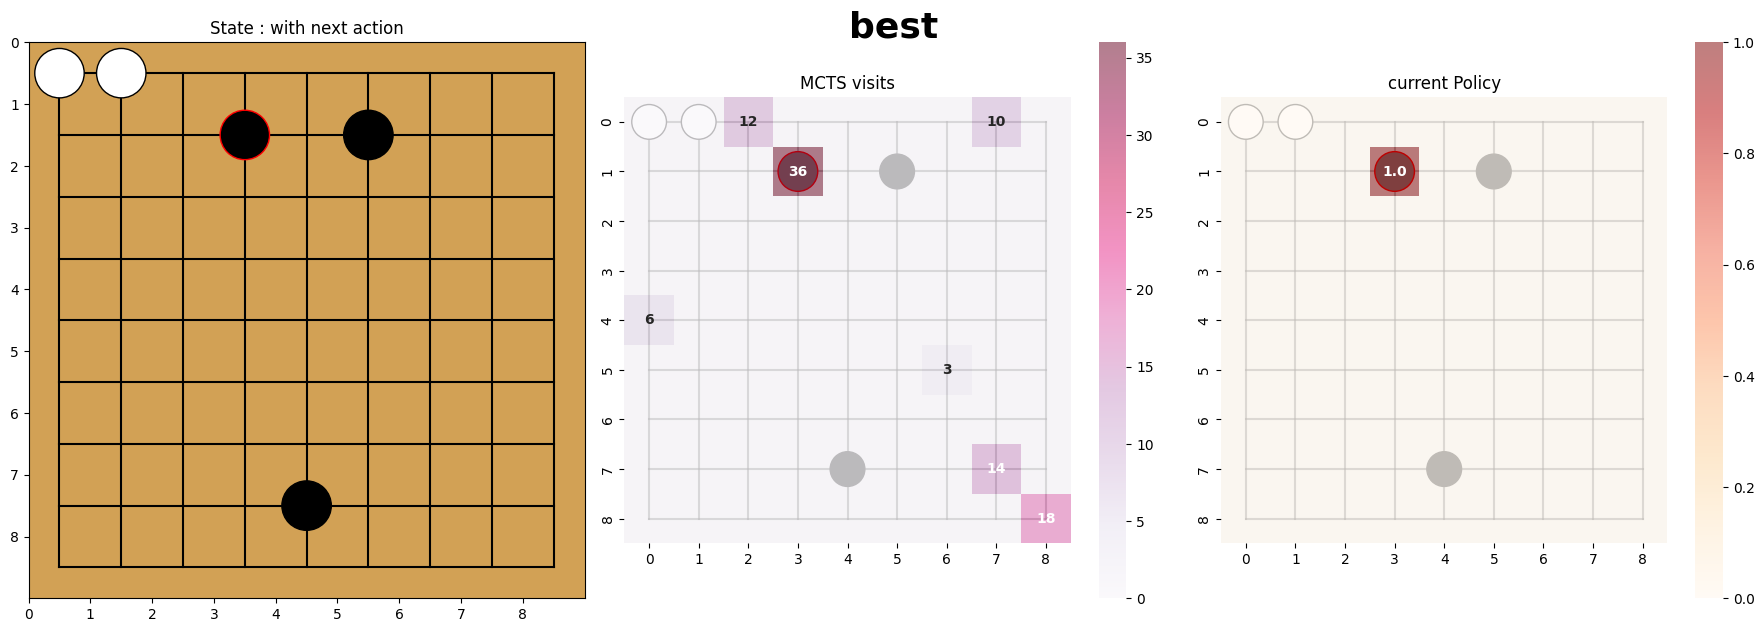

Alpha Zero's Action is : 12


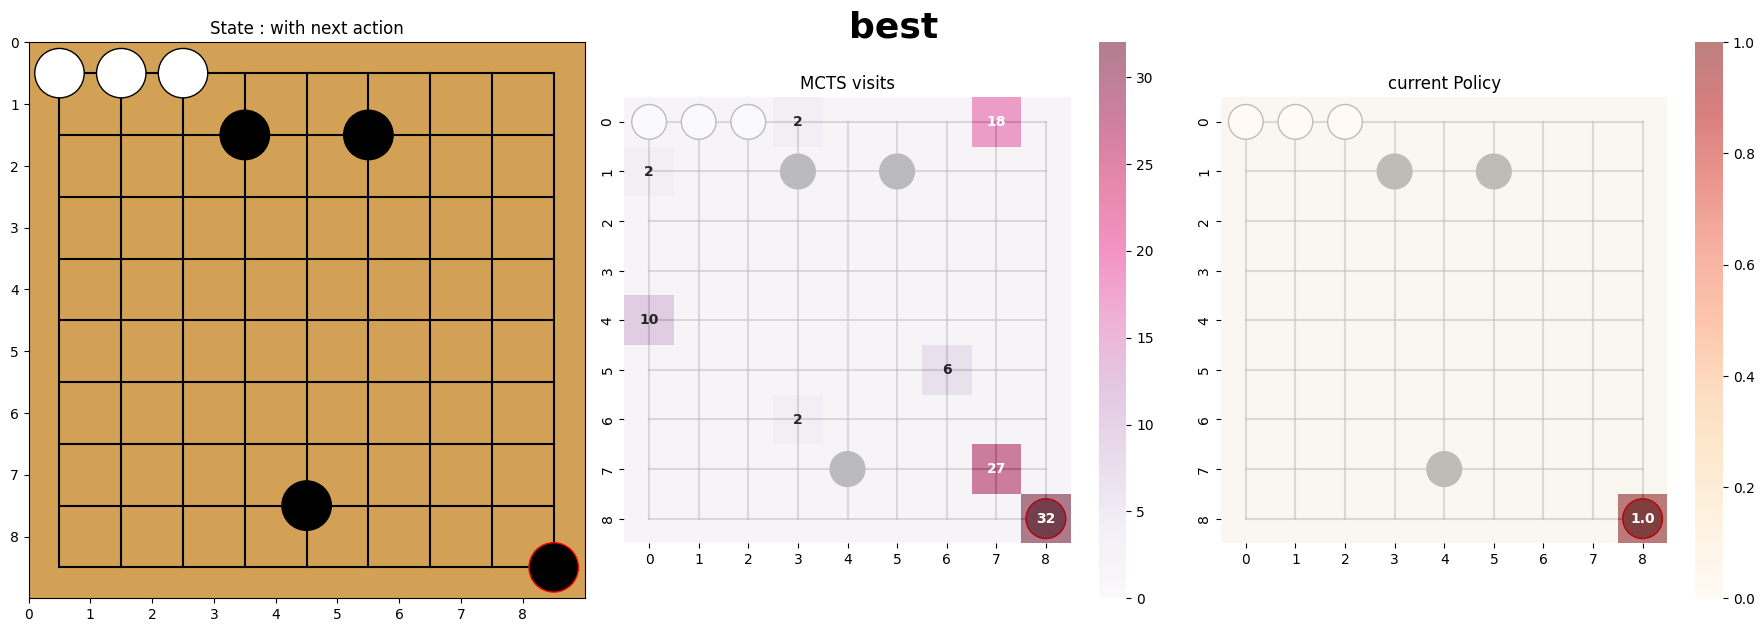

Alpha Zero's Action is : 80


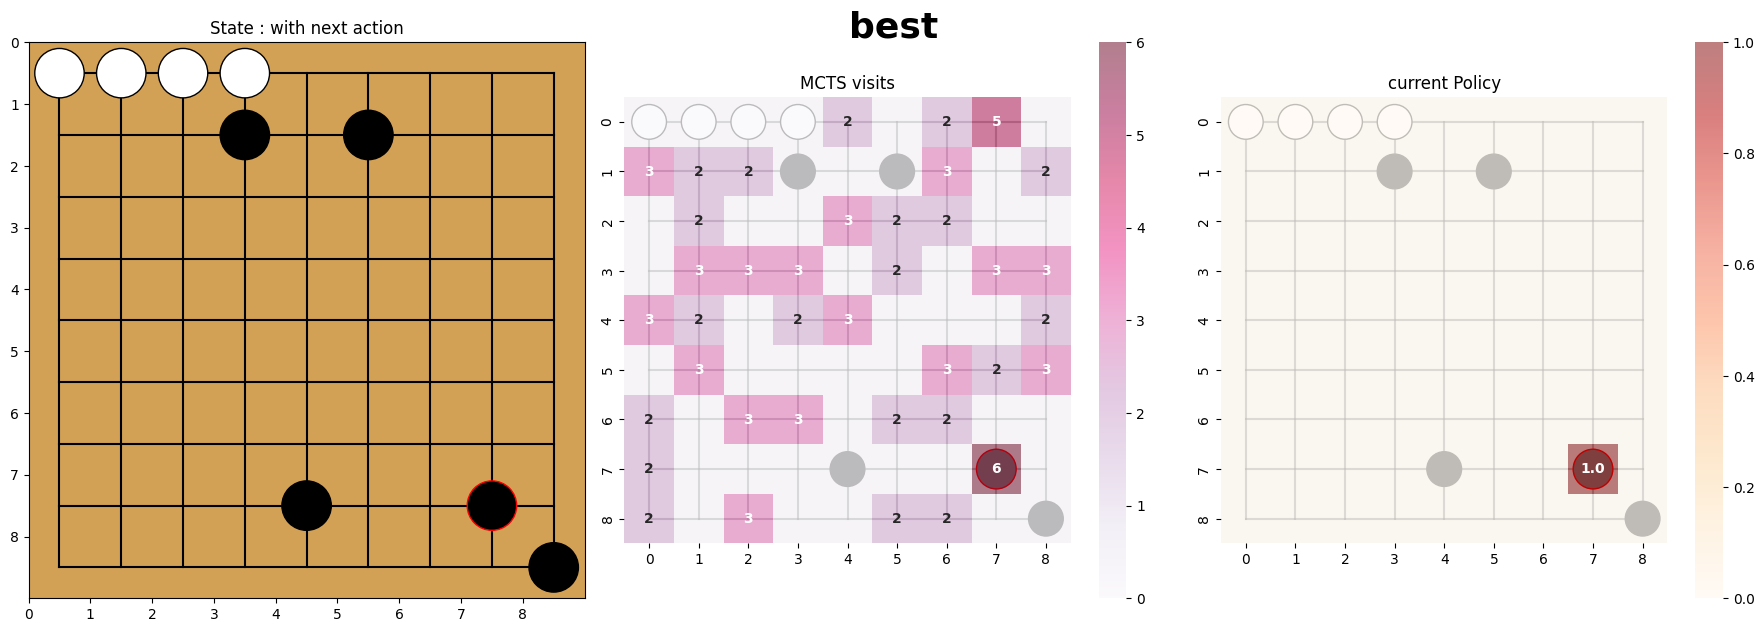

Alpha Zero's Action is : 70


In [4]:
# vs_human = ModelvsHuman(eval_network.best_model)

vs_human = ModelvsHuman(model)
vs_human()

In [ ]:
def flatten_idx(coord):
    return coord[0] * STATE_SHAPE[1] + coord[1]